# TP Classification

### author: Anastasios Giovanidis, 2018-2019

This is the TP related to classification.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In this class we will learn how to use PYTHON for classification, applying the following techniques:

- KNN
- Logistic Regression (multivariate)
- LDA
- QDA

## Preparation: Generating "synthetic" data

Let us first create a reasonable dataset related to $\mathrm{Default}$. The predictors are:

- Balance ('x')
- Income ('y')
- Student[Yes]

There are two classes: 

- Class A: $\mathrm{Default}=Yes$, 
- Class B: $\mathrm{Default}=No$.

We assume that the (balance, income) tuple follows for each class a bi-variate normal distribution
with different mean vector and covariance matrix. 

E.g. for class A: $\mu_A = [\mu_{A}(x),\ \mu_{A}(y)]$,
$\mathbf{\Sigma}_A = \left[\ [Var_A(x,x),Cov_A(x,y)],\  [Cov_A(y,x),Var_A(y,y)] \right]$, and similarly for class B.

In [4]:
muA = [700, 3000]
muB = [1350, 3000]
SigmaA = [[70000,0], [0,900000]]
SigmaB = [[70000,0], [0,900000]]
n = 300 # sample size

**Important note** Observe that the way synthetic data is generated is most adaptive to an LDA, because the covariance is the same for the two classes.

In [5]:
xA, yA = np.random.multivariate_normal(muA, SigmaA, n).T
# Avoid negatives
xA = list(np.multiply(xA>0,xA))
yA = list(np.multiply(yA>0,yA))
#
xB, yB = np.random.multivariate_normal(muB, SigmaB, n).T
# Avoid negatives
xB = list(np.multiply(xB>0,xB))
yB = list(np.multiply(yB>0,yB))

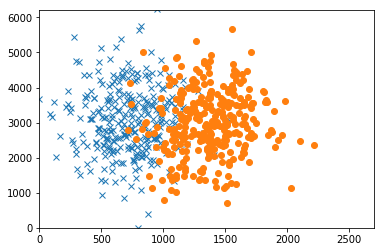

In [6]:
plt.plot(xA, yA, 'x')
plt.plot(xB, yB, 'o')
balanceMAX = 2700
incomeMAX = 6200
plt.axis([-1, balanceMAX, -1, incomeMAX])
plt.show()

Let us plot the histogram for the xA.

/Users/Fishbone/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


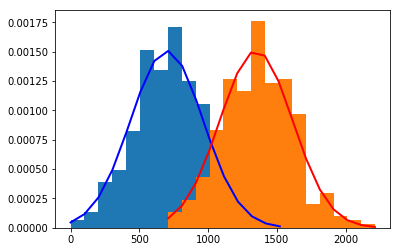

In [7]:
countA, binsA, ignoredA = plt.hist(xA, 15, normed=True)
countB, binsB, ignoredB = plt.hist(xB, 15, normed=True)
plt.plot(binsA, 1/( np.sqrt(2 * np.pi * SigmaA[0][0])) * np.exp( - (binsA - muA[0])**2 / (2 * SigmaA[0][0]) ), linewidth=2, color='b')
plt.plot(binsB, 1/( np.sqrt(2 * np.pi * SigmaB[0][0])) * np.exp( - (binsB - muB[0])**2 / (2 * SigmaB[0][0]) ), linewidth=2, color='r')
plt.show()

The actual data-trace will look as follows:

In [8]:
x = xA+xB
y = yA+yB
defaultA = list(np.zeros(len(xA)))
defaultB = list(np.ones(len(xB)))
default = defaultA + defaultB
for i in range(len(default)): 
    default[i] = int(default[i]) 

Generate Student[Yes] predictor. We give a higher probability for someone with high $x$ (Balance) to be a student, because we assume that students tend to borrow money from a bank for their studies (tendency for higher balance).

In [9]:
Student = list()
Mx = max(x)
for i in range(len(x)):
    p = x[i]/max(x)/2
    Student.extend(np.random.binomial(1, p, 1))
#

In [10]:
# Percentage of students in the data set
muS = sum(Student)/len(Student)

In [11]:
print(muS)

0.24333333333333335


Create a Dictionary of DATA

In [12]:
DATA = {}
for i in range(len(x)):
    DATA[i] = {}
    DATA[i]['predictors'] = [x[i],y[i],Student[i]]
    DATA[i]['Default'] = default[i]

In [13]:
print(DATA[1])

{'predictors': [853.3355851110603, 3446.635454481813, 1], 'Default': 0}


## Exercise 1 (KNN)

Use the K-Nearest-Neighbours classification method, to build a $\mathrm{Default}=\left\{Yes,No\right\}$ classifier, based on the DATA available. For the moment you need to ignore the $\mathrm{Student}$ predictor, and onlt use the pair of predictors $(\mathrm{Balance},\mathrm{Income})$.

### Part A

For $K=1,3,10,40$

- Train the KNN classifier.
- Plot a 2D map of the areas where $\mathrm{Default}=Yes$.

Discuss your observations.

### Part B

- Split in several random ways the initial DATA set into Train-Test datasets $X01train$, $X01test$ and use these to estimate the Test Classification error for each $K$. Then average over all the ways that the set was split to derive the average Test error per $K$. What is your conclusion about the optimal $K$ value among the values you checked?

**Answer: (Part A)**

First create input vector X01 containing only the 0 and 1 entry of each vector.

In [17]:
X01 = list()
for i in DATA:
    X01.append(DATA[i]['predictors'][:2])

In [18]:
X01[1]

[328.75702897708027, 2801.408227852745]

In [14]:
K=10

In [20]:
# fitting the data
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=K)
neigh.fit(X01, default)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [21]:
print(neigh.predict([[1550,3000]]))

[1]


In [22]:
print(neigh.predict([[550,3000]]))

[0]


**Answer: (Part B)**

Use $ntest=180$ (or $30\%$ from $n$) random samples from the DATA as Test-dataset and the rest as Train-dataset.

One way to do this is the following:

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X01, default, test_size=0.3)#, random_state=0)
print(X_test[:4])

[[496.8287576981937, 4032.6955539571563], [1328.4093480736542, 1650.5223425077813], [1264.3346229654933, 4009.930994835525], [1211.7794886826125, 4258.993151235553]]


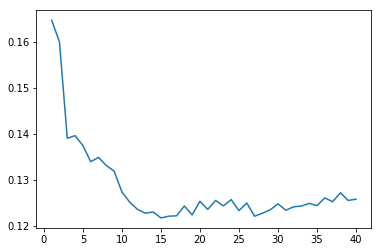

In [26]:
ErrMean_KNN = np.array(ErrA)/efforts
plt.plot(np.arange(1,Kmax+1), ErrMean_KNN)

In [27]:
print('Mean Error KNN = %.4f' % np.min(ErrMean_KNN))

Mean Error KNN = 0.1218


The minimum Test error is attained for $K\approx 15$.

## Exercise 2 (Logistic Regression)

- Split the original data set into a random train-test set. Use the Logistic Regression classifier, to derive the prediction for the first entry of the $Xtest$ set.

- Split in several ways the original data set into train-test sets. For each, calculate the error, and the average over all ways. What is the value of the Test error rate in Logistic Regression? Compare with the error rate form the optimal KNN classifier above. What do you see?

- Use the confusion matrix to evaluate the correctness of the predictor.

**Answer:**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
X_train, X_test, D_train, D_test = train_test_split(X01, default, test_size=0.3)#, random_state=0)
logreg = LogisticRegression().fit(X_train,D_train)

In [30]:
logreg.predict([X_test[0]])

array([0])

In [31]:
logreg.predict_proba([X_test[0]])

array([[0.79023351, 0.20976649]])

In [32]:
1-logreg.score(X_test,D_test)

0.12777777777777777

In [33]:
np.sum(np.abs(logreg.predict(X_test) - D_test))/len(D_test)

0.12777777777777777

Mean Error Logistic = 0.1174


The Logistic coefficients for the last Train-Test split are as follows:

In [35]:
print('logreg1.classes_ =', logreg1.classes_)
print('logreg1.coef_ =', logreg1.coef_)

logreg1.classes_ = [0 1]
logreg1.coef_ = [[ 0.00608485 -0.00021877]]


We can also see the confusion matrix with False/True Positives/Negatives.

In [36]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(D_test, D_esti)
print('confusion_matrix=\n', CM)
# x-axis is Known Truth, y-axis is Prediction.

confusion_matrix=
 [[83 12]
 [ 7 78]]


In [37]:
TE = (CM[1][0]+CM[0][1])/(CM[0][0]+CM[0][1]+CM[1][0]+CM[1][1])
print('Latest Test-Set Total Error= %.3f' %TE)

Latest Test-Set Total Error= 0.106


In [ ]:
FP = (CM[0][1])/(CM[0][0]+CM[0][1])
print('Latest Test-Set False Positive= %.3f' %FP)
TP = (CM[1][1])/(CM[1][0]+CM[1][1])
print('Latest Test-Set True Positive= %.3f' %TP)

**Comparison:**

Using statsmodels we get the following results:
(we do not use the Train-Test split here for simplicity)

In [39]:
import statsmodels.api as sm
logit_model=sm.Logit(default,X01)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.477377
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: y                AIC:              576.8529  
Date:               2019-02-01 16:22 BIC:              585.6467  
No. Observations:   600              Log-Likelihood:   -286.43   
Df Model:           1                LL-Null:          -415.89   
Df Residuals:       598              LLR p-value:      2.9452e-58
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.0035     0.0003    12.0554   0.0000    0.0029    0.0041
x2       -0.0011     0.0001   -11.3237   0.0000   -0.0013 

## Exercise 3 (Discriminant Analysis LDA & QDA)

- Use the $\mathrm{LinearDiscriminantAnalysis}$ (LDA) and $\mathrm{QuadraticDiscriminantAnalysis}$ (QDA) method to fit the Train Data and predict the Test Data.

- Again find the average Test Error using several Train-Test splits.

- Compare the Average Test Error for LDA, QDA, Logistic and KNN. Order the methods for the specific dataset.

**Answer:**

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

In [41]:
X_train, X_test, D_train, D_test = train_test_split(X01, default, test_size=0.3)#, random_state=0)
LDA = LinearDiscriminantAnalysis()

In [42]:
LDA.fit(X_train,D_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [43]:
LDA.predict([X_test[0]])

array([1])

In [44]:
LDA.predict_proba([X_test[0]])

array([[0.20348689, 0.79651311]])

In [45]:
1-LDA.score(X_test,D_test)

0.12222222222222223

We can also find the linear coefficients of the LDA:

In [46]:
print('LDA.classes_ =', LDA.classes_)
print('LDA.coef_ =', LDA.coef_)

LDA.classes_ = [0 1]
LDA.coef_ = [[8.78694309e-03 6.03160375e-05]]


Mean Error LDA = 0.1171


And the Quadratic Discriminant Analysis (QDA)

In [48]:
QDA = QuadraticDiscriminantAnalysis()

In [49]:
QDA.fit(X_train,D_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [50]:
QDA.predict([X_test[0]])

array([1])

In [51]:
QDA.predict_proba([X_test[0]])

array([[0.06660444, 0.93339556]])

In [52]:
1-QDA.score(X_test,D_test)

0.11111111111111116

Mean Error QDA = 0.1195


**Order** We observe that for the Average Mean Test Error the methods are ordered as follows:

???

## Exercise 4 (Uniform data)

Generate again an artificial dataset where the (Balance,Income) tuple is generated from two independent uniform distributions. The ranges are:

- Class A (no Default): Income is $[100,6000]$ and the range of Balance is $[10,1500]$, number of samples 300.

- Class B (yes Default): Income is $[100,6000]$ and the range of Balance is $[1000,2500]$, number of samples 100.

(A) Find the Mean Test Error Rate (using the average of several Train-Test splits) for all the above methods and specifically: 1NN, 3NN, 10NN, LR, LDA, QDA.

(B) Order the methods by their quality. Which one is better? Why?

**Answer:**

We first generate the uniform "synthetic" data.

Hence, we observe that for the Average Mean Test Error the methods are ordered as follows:

???

## Exercise 5 (Class related covariance matrix $\Sigma_1\neq \Sigma_2$)

Generate again an artificial dataset where the (Balance,Income) tuple is generated from a binormal distribution. The data from the two classes have different means and covariances for their predictors:

In [78]:
muSA = [700, 3000]
muSB = [1350, 3000]
SigmaSA = [[70000,-100], [-100,900000]]
SigmaSB = [[70000,+200], [+200,900000]]
nS = 300 # sample size

(A) Find the Mean Test Error Rate (using the average of several Train-Test splits) for all the above methods and specifically: 10NN, LR, LDA, QDA.

(B) Order the methods by their quality. Which one is better? Why?

**Answer:**

Hence, we observe that for the Average Mean Test Error the methods are ordered as follows:

???

## Exercise 6 (non-linear predictors)

Generate again an artificial dataset where the (Balance,Income) tuple is generated from two Normal distributions as the first dataset. You can also use non-zero covariance between the variables.

Then, suppose that the values of (Balance, Income) are not observed, but rather the triplet of predictors: 

($\mathrm{Balance^2},\mathrm{Income^{0.5}}, \mathrm{Balance\times Income}$).

(A) Find the Mean Test Error Rate (using the average of several Train-Test splits) for all the above methods and specifically: 1NN, 3NN, 10NN, LR, LDA, QDA.

(B) Order the methods by their quality. Which one is better? Why?

**Answer:**

Hence, we observe that for the Average Mean Test Error the methods are ordered as follows:

???